# 2.3.1 Improving Plots Aesthetics

之前我们只是在探索数据，没有特别关注图的外观。本章将讨论如何基于一个标准的Matplotlib Plot，一步步提升图的外观。

- ### Introduction to the Data

[The Department of Education Statistics](https://app.dataquest.io/m/147/improving-plot-aesthetics/2/introduction-to-the-data) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](https://app.dataquest.io/m/147/improving-plot-aesthetics/2/introduction-to-the-data). Here's a preview of the first few rows:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


-- 表中的数字代表对应专业女性毕业生占总体的比例

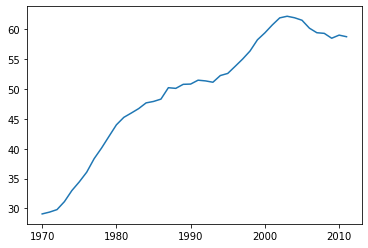

In [2]:
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

如果我们在同一plot中可视化授予男性的生物学学位的趋势，读者可以观察每个性别的界限之间的空间。我们可以通过从`100`个减去`Biology`列中的每一个值来计算授予男性的生物学学位的百分比。一旦我们有了男性百分比，我们可以在同一plot中生成两个折线图。

- ### Visualizing the Gender Gap

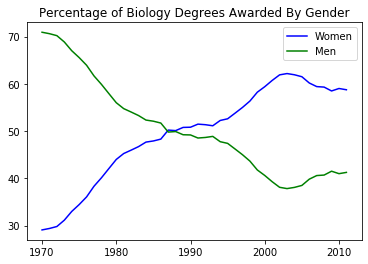

In [3]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], 
         c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'],
         c='green', label='Men')

plt.legend(loc='upper right') #`loc`不能少，plt.legend('upper right')是错的
plt.title("Percentage of Biology Degrees Awarded By Gender")

plt.show()

- ### Data-Ink Ratio

尽管我们的图好了一些，但它仍然包含一些对于了解数据不重要的视觉元素。我们有兴趣帮助人们了解不同领域的性别差距。这些多余的元素，有时被称为**chartjunk**，随着我们添加更多的图来可视化其他方面，我们的图表会愈发难以解释。一般来说，我们希望最大化**Data-Ink-Ratio**，这是专用于显示数据的绘图区域的分数量。

**数据墨水比**（Data-Ink-Ratio）就是在展示页面上，用于展示**数据所用的“墨水”量**与**页面上全部“墨水”量**之间的比值。

以下是 Darkhorse Analytics 制作的 GIF，它显示了为提高数据墨水比的一系列调整：

![Data-Ink](data-ink.gif "segment")

非数据墨水包括刻度线、标签、图例等

Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by **Edward Tufte**, a pioneer of the field of data visualization. Tufte's first book, *The Visual Display of Quantitative Information*, is considered a bible among information designers. We cover some of the ideas presented in the book in this course, but we recommend going through the entire book for more depth.

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

- Remove all of the axis tick marks.
- Hide the spines, which are the lines that connects the tick marks, on each axis.

- ### Hiding Tick Marks

想要更改刻度，需要用到`Axes.tick_params()`方法。

默认情况下Matplotlib会在图的四周都展示刻度，想要隐藏它们, we need to pass in the following values for each parameter when we call `Axes.tick_params()`：
- `bottom`: `"off"`
- `top`: `"off"`
- `left`: `"off"`
- `right`: `"off"`

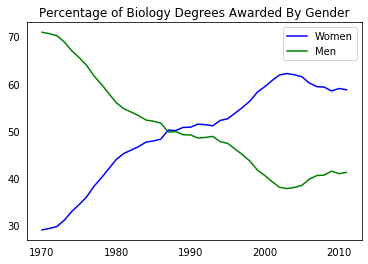

In [4]:
plt.plot(women_degrees['Year'], women_degrees['Biology'],
         c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'],
         c='green', label='Men')

plt.tick_params(left=False, right=False, top=False, bottom=False)

plt.legend(loc='upper right')
plt.title("Percentage of Biology Degrees Awarded By Gender")

plt.show()

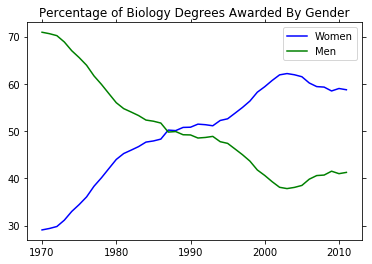

In [5]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')

ax.tick_params(bottom="off", top="off", left="off", right="off") #新版用'off'不行了

ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

- ### Hiding Spines（边框）

在matplotlib中, the spines（边框） are represented using the [matplotlib.spines.Spine](https://matplotlib.org/stable/api/spines_api.html) class. 

当我们创建一个Axes实例, 4个 Spine 对象 are created for us. 运行 `print(ax.spines)`会得到一个Spine对象的字典:

In [6]:
print(ax.spines)

OrderedDict([('left', <matplotlib.spines.Spine object at 0x7fda67624a50>), ('right', <matplotlib.spines.Spine object at 0x7fda67624150>), ('bottom', <matplotlib.spines.Spine object at 0x7fda67624650>), ('top', <matplotlib.spines.Spine object at 0x7fda67624a10>)])


想要隐藏边框，我们需要：
- access each Spine object in the dictionary
- call the `Spine.set_visible()` method
- pass in the Boolean value `False`

以下代码可以隐藏右边框：  
`ax.spines["right"].set_visible(False)`

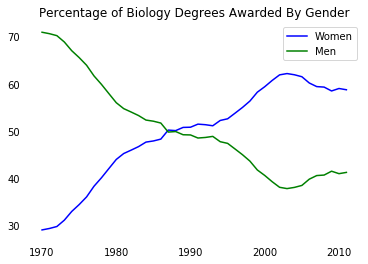

In [7]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(left=False, right=False, top=False, bottom=False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

用循环替换繁复的代码：
```
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
```
->
```
for key,spine in ax.spines.items():
        spine.set_visible(False)
```

In [8]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x7fda674c7190>),
             ('right', <matplotlib.spines.Spine at 0x7fda674c7710>),
             ('bottom', <matplotlib.spines.Spine at 0x7fda674c73d0>),
             ('top', <matplotlib.spines.Spine at 0x7fda674c7350>)])

In [9]:
ax.spines.items()

odict_items([('left', <matplotlib.spines.Spine object at 0x7fda674c7190>), ('right', <matplotlib.spines.Spine object at 0x7fda674c7710>), ('bottom', <matplotlib.spines.Spine object at 0x7fda674c73d0>), ('top', <matplotlib.spines.Spine object at 0x7fda674c7350>)])

因为ax.spines.items()是储存了spine对象的字典，因此`for key,spine in ax.spines.items()`中的`spine`可以取到spine对象

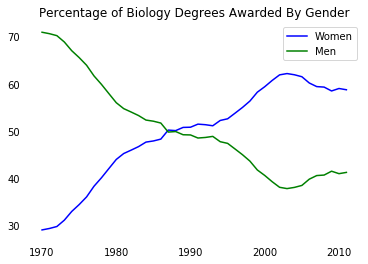

In [10]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(left=False, right=False, top=False, bottom=False)

for key,spine in ax.spines.items(): 
        spine.set_visible(False)

ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

- ### Comparing Gender Gap Across Degree Categories

Matplotlib会根据数据设置不同的轴范围，这样当我们想要比较多个数据时，轴刻度的不统一可能会使得对比图难以理解，因此统一轴刻度是很有必要的

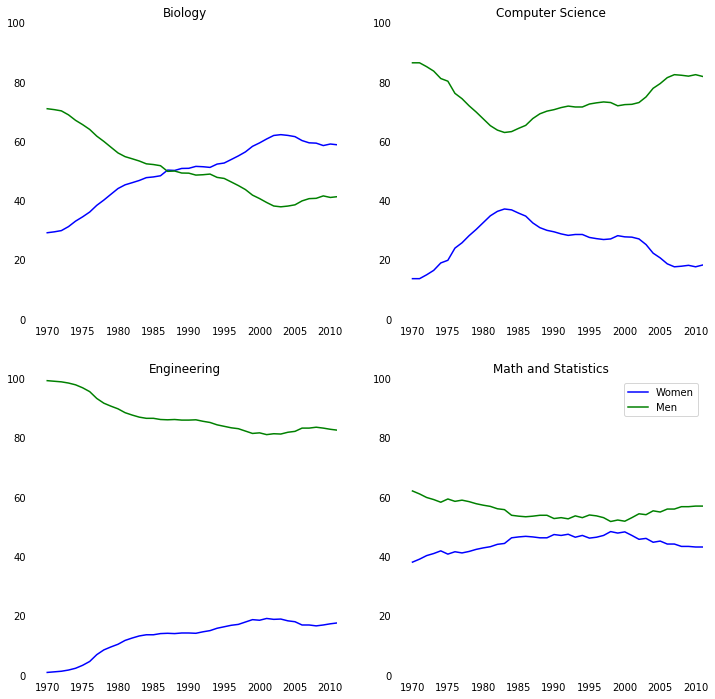

In [11]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    # 设置固定的轴刻度范围
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100) 
    # 隐藏边框
    for key, spine in ax.spines.items():
        spine.set_visible(False)

    # 隐藏刻度
    ax.tick_params(top=False, bottom=False, right=False, left=False)
    
    ax.set_title(major_cats[sp])

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

# 2.3.2 Color, Laylot, and Annotations

在以上的任务中，我们学到了一些基本的技巧和原则，使我们的plot更美观。在此任务中，我们将更直接地专注于自定义颜色、行宽度、布局和注释，以提高查看者从图表中提取见解的能力。我们将继续使用包含 1970 年至 2012 年授予女性学士学位百分比的数据集

- ### Setting Line Color Using RGB

数据可视化时应意识到有些人可能是色盲。值得庆幸的是，一些调色板对色盲患者非常友好。其中之一被称为**Color Blind 10**，由*Tableau*发布，该公司使同名的数据可视化平台。导航到[此页面](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html)，从调色板列表中仅选择**Color Blind 10**选项，以查看其中包含的 10 种颜色。

![Color Blind 10](tableau_rgb_values.png)

每个色带旁边有三个整数值，按句点（`.`）分隔

这些数字表示每个颜色的 **RGB 值**。[RGB 颜色模型](https://zh.wikipedia.org/wiki/三原色光模式)描述了如何以不同比例组合三种主要颜色（红色、绿色和蓝色）以形成任何次要颜色。RGB 色彩模型对于从事摄影、电影摄影、平面设计以及广泛使用色彩的任何领域的人员非常熟悉。在计算机中，每个 RGB 值的范围在 0 到 255 之间。

The first color in the palette is a color that resembles dark blue and has the following RGB values:

- Red: `0`
- Green: `107`
- Blue: `164`

要使用 RGB 值指定行颜色，需要将RGB的值作为**tuple**传递给 `c` 参数。Matplotlib 需要每个值将缩小，范围在 0 和 1 之间（不是 0 和 255）。在以下代码中，我们将Color Blind 10 调色板中的第一种颜色缩放，并将其设置为线的颜色：
```
cb_dark_blue = (0/255,107/255,164/255)
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women', c=cb_dark_blue)
```

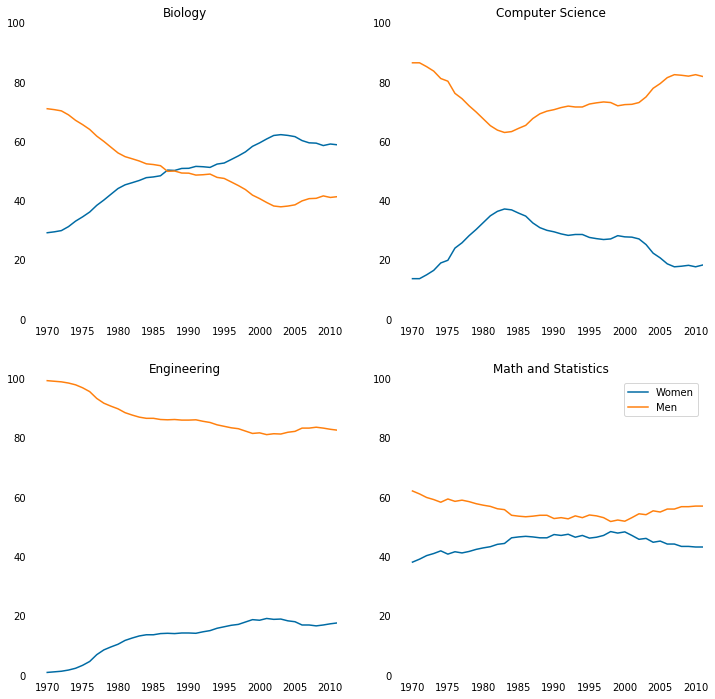

In [12]:
fig = plt.figure(figsize=(12, 12))
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(top=False, bottom=False, right=False, left=False)

plt.legend(loc='upper right')
plt.show()

- ### Setting Line Width

默认情况下，折线图的线都很细，白色仍占据plot的主要部分，为了强调线条，我们可以调整线条的粗细。

`Axes.plot()`里的`linewidth`参数可以做到这一点，其接受float类型的值

`ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women', c=cb_dark_blue, linewidth=2)`

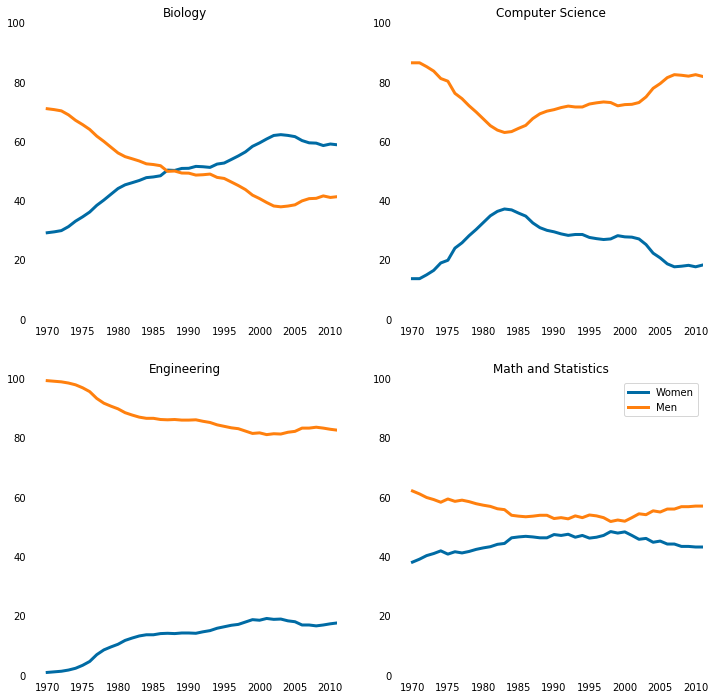

In [13]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(top=False, bottom=False, right=False, left=False)

plt.legend(loc='upper right')
plt.show()

- ### Improve the Layout and Ordering

以上图像的排列方式没有什么条理，可能会引起观看者的挫败感，为了更连贯地展示图像，我们可以按照一定的顺序排列：

![initial](line_charts_dec_initial_gg.png)

上图最左边的plot在1968年有最大的性别差距，而最右边的plot在1968年有最小的性别差距。（按照initial gender gap排列）

如果我们对最近的STEM学位性别差距感兴趣，我们可以从2011年的性别差距从最大到最小排列：（按照ending gender gap排列）

![ending](line_charts_dec_ending_gg.png)

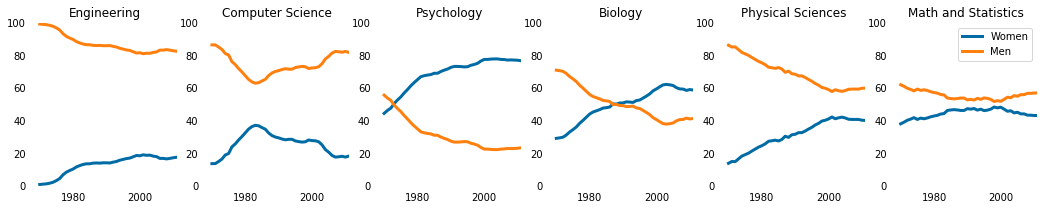

In [14]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(top=False, bottom=False, right=False, left=False)

plt.legend(loc='upper right')
plt.show()

- ### Replacing the Legend with Annotations

图例为非数据墨水，会占据宝贵的空间，预期想方设法将其移动到合适的位置，Tufte鼓励尽可能移除图例

要将文本注释添加到垫片情节中，我们使用`Axes.text()`方法。此方法有几个必需的参数：
- `x`: x轴坐标 (as a float)
- `y`: y轴坐标 (as a float)
- `s`: 想要输入的文本 (as a string value)

坐标网格中的值与 x 轴和 y 轴的数据范围完全匹配。如果我们想在 x 轴和 y 轴的交叉点添加 `1979` 的文本，我们将传递这些参数值：

`ax.text(1970, 0, "starting point")`

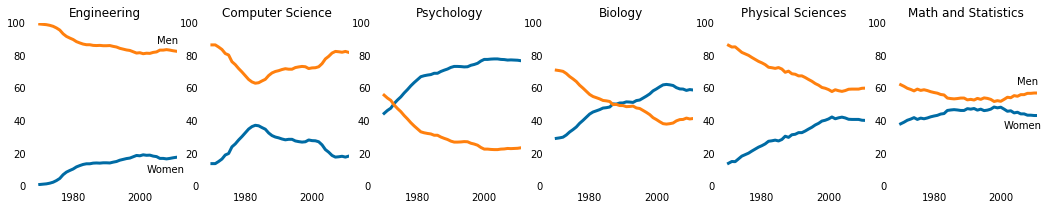

In [15]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(top=False, bottom=False, right=False, left=False)
    
    if sp == 0:
        ax.text(x=2005,y=87,s="Men")
        ax.text(x=2002,y=8, s="Women")
    elif sp == 5:
        ax.text(2005,62,"Men")
        ax.text(2001,35,"Women")
        
plt.show()

# 2.3.3 Guided Project

在*project*文件夹中

# 2.3.4 Conditional Plot

到目前为止，我们主要使用可快速分析和理解的图，折线图，散点图和条形图使我们能够向读者传达一些见解。我们还探讨了如何以有趣的方式组合这些图，以传达更深刻的见解，并继续扩展数据可视化的讲故事能力。

接下来，我们将探索如何使用一个或多个**条件**快速创建多个图。

We'll be working with the [seaborn](http://seaborn.pydata.org) visualization library, 

**Seaborn**是基于matplotlib的Python数据可视化库。它提供了用于绘制引人入胜且内容丰富的统计图形的高级界面。

以下为使用Seaborn创建的复杂plot的案例

![Seaborn](seaborn_gallery.png)

- ### 数据介绍

我们将使用关于泰坦尼克号上乘客的数据集

该数据集由 Kaggle 为他们的数据科学入门竞赛编写, 叫做 **Titanic: Machine Learning from Disaster**. 竞赛的目标是建立一个可以根据一个乘客的特征预测他是否能够生存的机器学习模型

The data for the passengers is contained in two files:

- `train.csv`: Contains data on 712 passengers
- `test.csv`: Contains data on 418 passengers

数据的每一行代表一个乘客，我们将使用`train.csv`，以下是各个列的描述：

- `PassengerId` -- A numerical id assigned to each passenger.
- `Survived` -- Whether the passenger survived (`1`), or didn't (`0`).
- `Pclass` -- The class the passenger was in.
- `Name` -- the name of the passenger.
- `Sex` -- The gender of the passenger -- male or female.
- `Age` -- The age of the passenger. Fractional.
- `SibSp` -- The number of siblings and spouses the passenger had on board.
- `Parch` -- The number of parents and children the passenger had on board.
- `Ticket` -- The ticket number of the passenger.
- `Fare` -- How much the passenger paid for the ticket.
- `Cabin` -- Which cabin the passenger was in.
- `Embarked` -- Where the passenger boarded the Titanic.

Let's remove columns like `Name` and `Ticket` that we don't have a way to visualize. 

In [16]:
titanic = pd.read_csv("train.csv")
titanic = titanic[['Survived','Pclass', 'Sex', 'Age', 'SibSp',
                   'Parch', 'Fare', 'Embarked']]

we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.   
使用[DataFrame.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)方法移除包含缺失值的行

In [17]:
titanic = titanic.dropna()

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- ### Creating Histograms in Seaborn

Seaborn和Matplotlib相似，也是一层一层地画图，最后可以用`plt.show()`展示

We can generate a histogram of the `Fare` column 使用函数[seaborn.distplot()](https://app.dataquest.io/m/152/conditional-plots/3/creating-histograms-in-seaborn) (distribution plot的缩写）:   
```
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
sns.distplot(titanic["Fare"])
plt.show()
```

在后台，seaborn使用matplotlib创建直方图，缩放轴值并设置其样式。另外，seaborn使用一种称为核密度估计（kernel density estimation, KDE）的技术来在直方图上创建平滑的折线图。

所得的线是直方图的平滑版本，称为**kernel density plot**(核密度图)。当我们比较分布时，核密度图特别有用，

得到的线是：对于未知分布，通过核密度估计得到的**估计的概率密度函数**的图像（应该吧）,

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


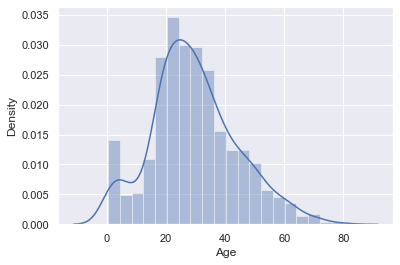

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.distplot(titanic['Age'])
plt.show()

- ### Generating Kernel Density Plot

使用[seaborn.kdeplot()](http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)仅生成核密度图：

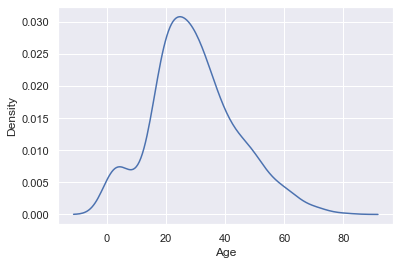

In [22]:
sns.kdeplot(titanic["Age"])

使用参数`shade`，把curve下的空间（AUC）着色

Text(0.5, 0, 'Age')

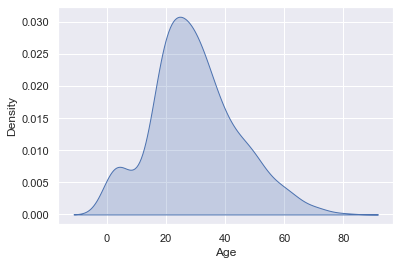

In [23]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')

- ### Modifing the Appearance of the Plots

使用 [seaborn.set_style()](https://app.dataquest.io/m/152/conditional-plots/5/modifying-the-appearance-of-the-plots) 改变seaborn默认的样式：

- `darkgrid`: Coordinate grid displayed, dark background color
- `whitegrid`: Coordinate grid displayed, white background color
- `dark`: Coordinate grid hidden, dark background color
- `white`: Coordinate grid hidden, white background color
- `ticks`: Coordinate grid hidden, white background color, ticks visible

![styles](seaborn_all_styles.png)

In [24]:
sns.set_style("darkgrid")

使用此方法改变样式表后, 未来所有的plots都会应用此样式. 这意味着你需要在生成plot之前设置style



想要删除顶部和右侧的spine，使用[seaborn.despine()](http://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine)

`seaborn.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`

可以看出，默认情况下只会隐藏`top`和`right`的spine，如果想要移除另两个，需要把`left`和`bottom`也设置为`True`

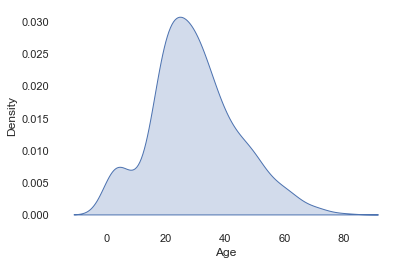

In [25]:
sns.set_style("white")

sns.kdeplot(titanic["Age"], shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom=True)

- ### Conditional Distribution Using A Single Condition

在Seaborn中，我们可以通过指定条件标准和所需的数据可视化类型 来创建对比图。例如，通过创建一对内核密度图，我们可以可视化幸存的乘客与未幸存的乘客之间的年龄分布差异。一个内核密度图将可视化`Survived`等于`0`的`Age`列中值的分布，而另一个将可视化`Survived`等于`1`的`Age`列中的值分布。

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


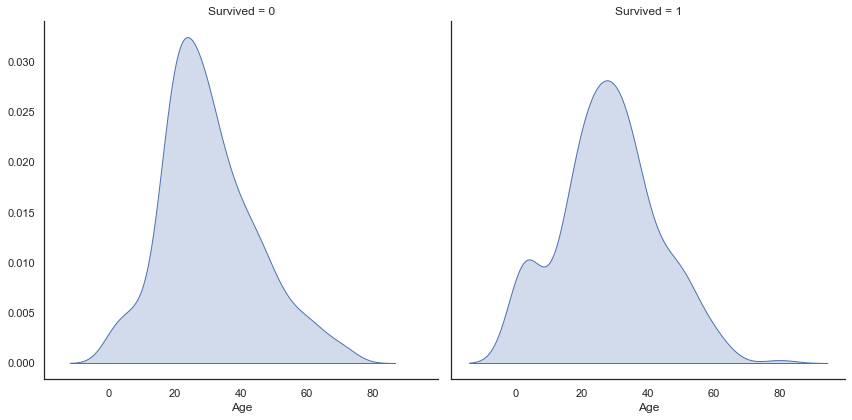

In [26]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)

Seaborn handled:

- subsetting the data into rows where `Survived` is `0` and where `Survived` is `1`
- creating both Axes objects, ensuring the same axis scales
- plotting both kernel density plots

Seaborn允许我们将所需的图表示为参数值，而不是取子集数据再生成各自的图. [seaborn.FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)是图像布局的类(即plots的网格），其对象用于表示网格中图的布局，以及用于把数据分割为子集的列。 `FacetGrid`里的`facet`相当于单词`subset`. 将`col`参数设置为`Survived`，将为`Survived`列中的每个唯一值指定一个单独的plot。将`size`参数设置为`6`将为每个plot指定6英寸的高度。

facet
1. n. 面；方面；小平面
2. vt. 在…上琢面

近义词：特征feature，character

一旦创建了网格，就可以使用`FacetGrid.map()`方法为各个的`Survived`值创建不同的图。 Seaborn为幸存的和没能幸存的乘客年龄各生成了一个内核密度图。

传递进`FacetGrid.map()`方法的函数必须是有效的Matplotlib或seaborn函数。例如我们把Matplotlib直方图 map 进 facetgrid：

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


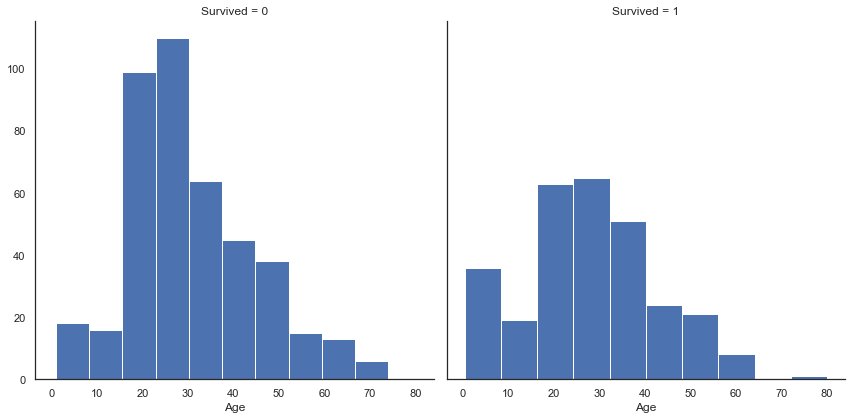

In [27]:
g = sns.FacetGrid(titanic, col="Survived", size=6)
g.map(plt.hist, "Age")

Let's create a grid of plots that displays the age distributions for each class：

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


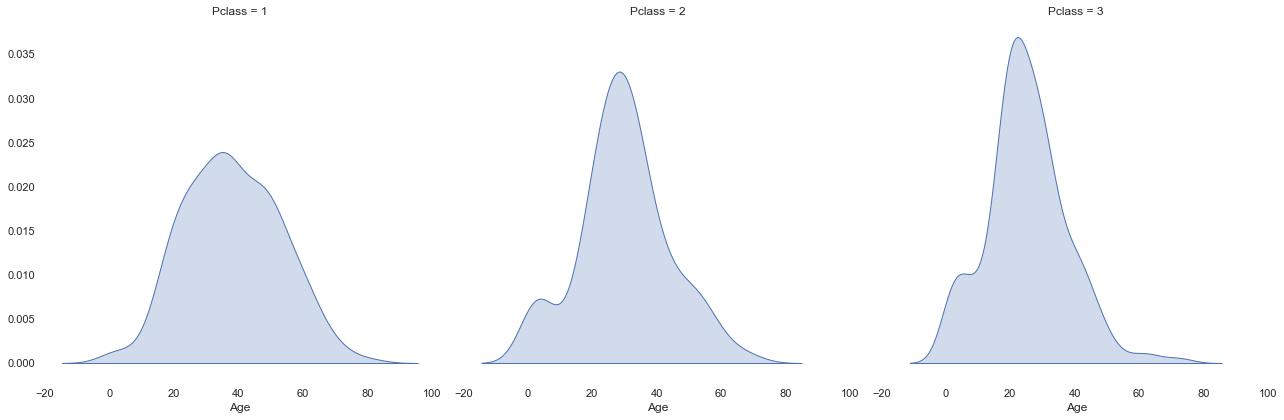

In [28]:
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

- ### Creating Conditional Plots Using Two Conditions

我们当然也可以使用两个条件来生成grid of plot, 每一格都包含一个数据的子集和条件的一个组合

此时，我们需要在创建FacetGrid实例时，使用`row`参数来指定要**绘制于grid中的行**中的子集化的列。

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


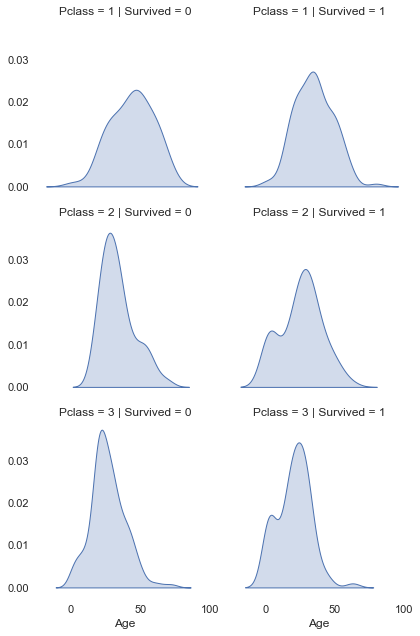

In [29]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

- ### Creating Conditional Plots Using Three Conditions

当使用两个条件子集化数据时，grid中的行代表一个条件，列代表另一个。

如果想要使用三个条件，我们可以使用不同的颜色。

我们可以通过在网格中的同一子图上生成多个图表达第三个条件，并以不同的方式对它们进行着色。值得庆幸的是，我们只需将`hue`参数设置为DateFrame中的列名称，即可添加条件。

hue: n. 色彩；色度；叫声

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


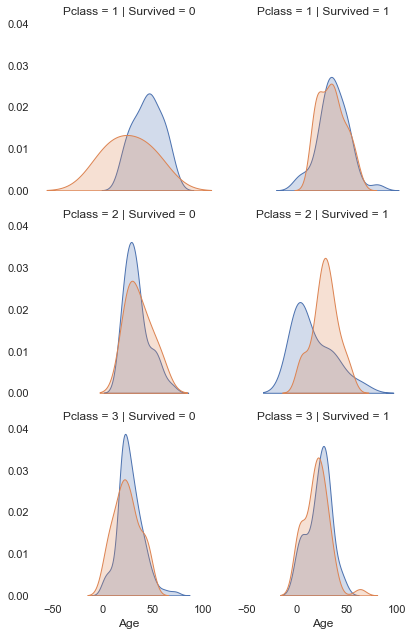

In [30]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

- ### Adding Legend

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


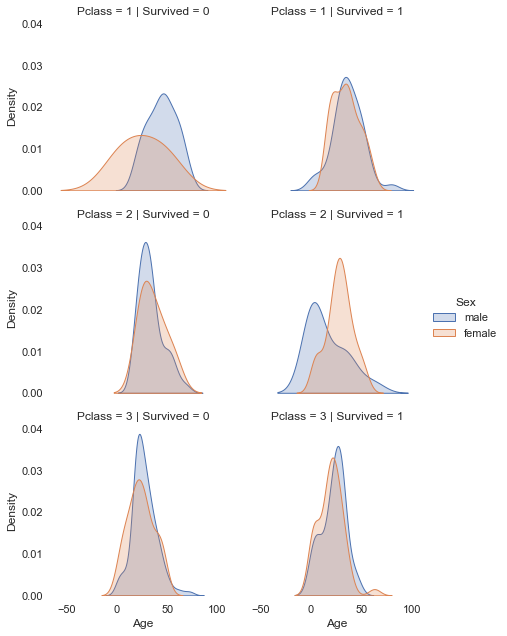

In [31]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)

g.add_legend()#添加图例

g.set_axis_labels("Age","Density") #添加轴标签

sns.despine(left=True, bottom=True) #移除边框，这一步要放在最后，但是好像放在前面也没影响
plt.show()